# Analyzing and Replicating the Paper titled "SOCIAL CLASS AND SURVIVAL ON THE S.S. TITANIC"  Available through https://doi.org/10.1016/0277-9536(86)90041-9

In this Project we embark on analyzing the paper by title "SOCIAL CLASS AND SURVIVAL ON THE S.S. TITANIC " which states that Gender and social class impacted the survival chance on the titanic ship. The paper states that Female were more favoured to survive as compared to there male counterpart. Social class in this case Fare or ticket class also played a role as mentioned (Hall, 1986). The data used here originally is from Kaggle. The data from Kaggle had alot of missing value of our variable of interest. I did some webscripting from encyclopedia titanica for some additional information about the passengers. 

In [130]:
# import packages
%matplotlib inline
import requests
from bs4 import BeautifulSoup, Comment
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
matplotlib.rcParams['figure.figsize'] = (12,8)
pd.options.mode.chained_assignment = None

In [131]:
data=pd.read_csv("full.csv")

In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 21 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
WikiId         1304 non-null float64
Name_wiki      1304 non-null object
Age_wiki       1302 non-null float64
Hometown       1304 non-null object
Boarded        1304 non-null object
Destination    1304 non-null object
Lifeboat       502 non-null object
Body           130 non-null object
Class          1304 non-null float64
dtypes: float64(6), int64(4), object(11)
memory usage: 214.9+ KB


Data Set Column Descriptions
pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
survived: Survival (0 = No; 1 = Yes)
name: Name
sex: Sex
age: Age
sibsp: Number of siblings/spouses aboard
parch: Number of parents/children aboard
fare: Passenger fare (British pound)
embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
adult_male: A male 18 or older (0 = No, 1=Yes)
deck: Deck of the ship
who: man (18+), woman (18+), child (<18)
alive: Yes, no
embarked_town: Port of embarkation ( Cherbourg, Queenstown, Southampton)
class: Passenger class (1st; 2nd; 3rd)
alone: 1= alone, 0= not alone ( you have at least 1 sibling, spouse, parent or child on board)

In [133]:
data.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
WikiId         float64
Name_wiki       object
Age_wiki       float64
Hometown        object
Boarded         object
Destination     object
Lifeboat        object
Body            object
Class          float64
dtype: object

In [134]:
#checking missing values 
data.isna().sum().sum()

3721

In [135]:
%timeit data.isna().sum().sum()

1.32 ms ± 68.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [136]:
data.isna().sum()/(len(data))*100

PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
WikiId          0.381971
Name_wiki       0.381971
Age_wiki        0.534759
Hometown        0.381971
Boarded         0.381971
Destination     0.381971
Lifeboat       61.650115
Body           90.068755
Class           0.381971
dtype: float64

**Given that age is one of our variable of interest we are going to us maximum likelihood fuction to fill in the missing values**

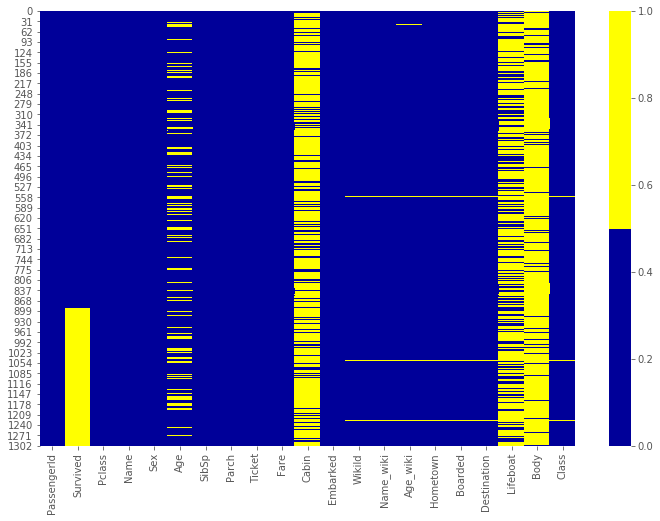

In [137]:
cols = data.columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours))

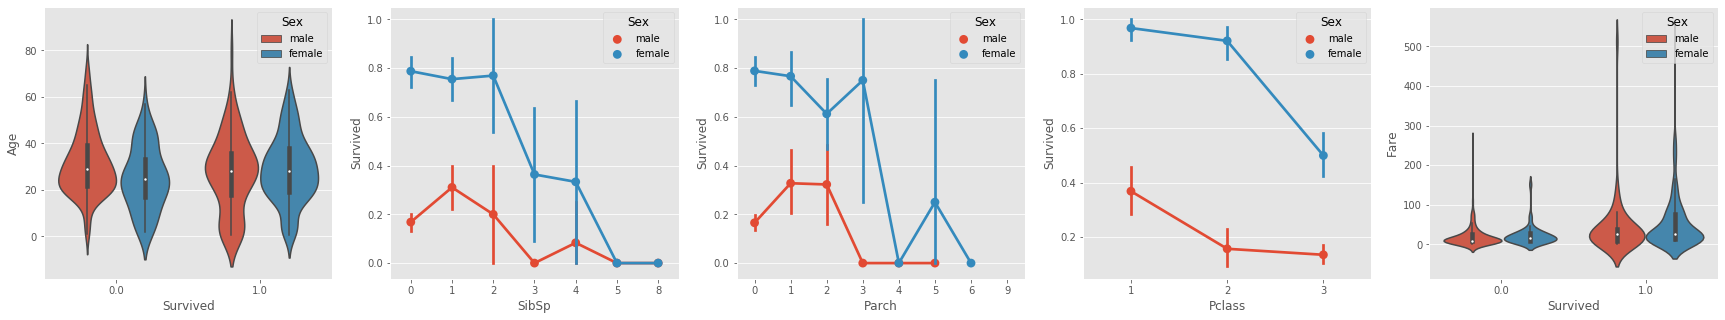

In [138]:
#Graphical analysis and representation of our variables of interst
fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="Survived", y="Age", hue="Sex", data=data, ax=axs[0])
sns.pointplot(x="SibSp", y="Survived", hue="Sex", data=data, ax=axs[1])
sns.pointplot(x="Parch", y="Survived", hue="Sex", data=data, ax=axs[2])
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=data, ax=axs[3])
sns.violinplot(x="Survived", y="Fare", hue="Sex", data=data, ax=axs[4])

In [139]:
data=data.drop(['Cabin','Lifeboat','WikiId','Age_wiki','Age_wiki','Body'], axis = 1) 

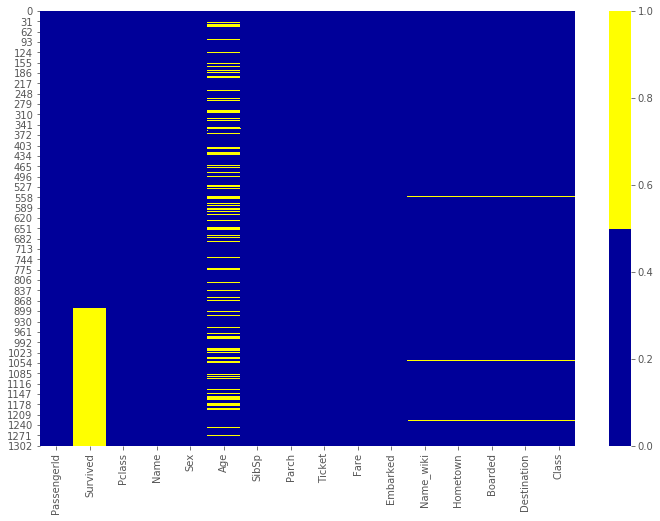

In [140]:
cols = data.columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours))

Age was one of our variable of interest, given that we had a significat amount of missing data, rougly 20% we could not just drop the missing rows. This is true as it could significantly affected our modelling. Less data can lead to undesiable outcome for example overfitting. I chose to input Age with KNN as KNN is much more accurate than the mean, median or most frequent imputation methods given our dataset. 

In [185]:
print("-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


# How KNN imputation works 

KNN creates a simple mean impute and then uses the resulting full list to create a KDTree. Then the corresponding KDTree is used to calculate the closest neighbors (NN). After discovering the k-nns, the weighted average of the k-nns is taken.

In [141]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)

In [142]:
Age = np.array(data["Age"]).reshape(-1, 1)
Age

array([[22. ],
       [38. ],
       [26. ],
       ...,
       [38.5],
       [ nan],
       [ nan]])

In [143]:
imputed_Age =imputer.fit_transform(Age)

In [144]:
data["Age"]= imputed_Age 

In [145]:
data["Age"].isnull

<bound method Series.isnull of 0       22.000000
1       38.000000
2       26.000000
3       35.000000
4       35.000000
          ...    
1304    29.881138
1305    39.000000
1306    38.500000
1307    29.881138
1308    29.881138
Name: Age, Length: 1309, dtype: float64>

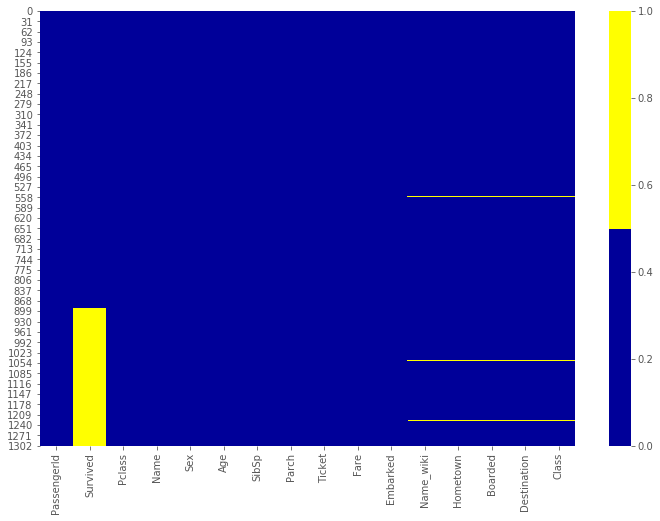

In [146]:
cols = data.columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours))

In [147]:
data=data.dropna()

In [153]:
#Droping columns that are not of interst
data=data.drop(columns = ["Name_wiki","Hometown","Destination","Name","Boarded","Ticket","Embarked"])

In [154]:
#changing the encodes from default float to interger
data["Survived"] = data["Survived"].astype(int)
data["Class"] = data["Class"].astype(int)

In [155]:
#Encoding Gender where male was assigned 1 and Female 0
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
data["Gender_code"] = ord_enc.fit_transform(data[["Sex"]])
data[["Sex", "Gender_code"]].head(11)

,Sex,Gender_code
0,male,1.0
1,female,0.0
2,female,0.0
3,female,0.0
4,male,1.0
5,male,1.0
6,male,1.0
7,male,1.0
8,female,0.0
9,female,0.0


In [156]:
data["Gender_code"] = data["Gender_code"].astype(int)

In [171]:
data=data.drop(columns = ["Sex"])

In [172]:
#the X variable will take everything expect the labels, as x is the input and is supposed to match to the correct label
X =data.drop(columns = ["Survived"])
y = data['Survived']

In [173]:
from sklearn.model_selection import train_test_split

In [174]:
from sklearn.ensemble import RandomForestClassifier

In [175]:
#Random forest using train test split
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.3,random_state=30,stratify=y)

In [176]:
X_train

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Class,Gender_code
397,398,2,46.000000,0,0,26.0000,2,1
282,283,3,16.000000,0,0,9.5000,3,1
367,368,3,29.881138,0,0,7.2292,3,0
729,730,3,25.000000,1,0,7.9250,3,0
238,239,2,19.000000,0,0,10.5000,2,1
...,...,...,...,...,...,...,...,...
108,109,3,38.000000,0,0,7.8958,3,1
859,860,3,29.881138,0,0,7.2292,3,1
132,133,3,47.000000,1,0,14.5000,3,0
496,497,1,54.000000,1,0,78.2667,1,0


In [182]:
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)

#  predictions using test set
preds = randomforest.predict(X_test)

In [183]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, preds, target_names=["Dead","Alive"]))

              precision    recall  f1-score   support

        Dead       0.85      0.90      0.87       165
       Alive       0.82      0.75      0.78       102

    accuracy                           0.84       267
   macro avg       0.83      0.82      0.83       267
weighted avg       0.84      0.84      0.84       267



In [179]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, precision_score, accuracy_score, recall_score, roc_auc_score
logRegr = LogisticRegression(max_iter=10000)
logRegr.fit(X_train, y_train)

#  predictions using test set
preds = logRegr.predict(X_test)

In [181]:
#Evaluating performance
print("The accuracy of the model is %.3f" %accuracy_score(y_test, preds)) 
print("The recall of the model  is %.3f" % recall_score(y_test, preds))
print("The precision of the model is  is %.3f" % precision_score(y_test, preds))

The accuracy of the model is 0.794
The recall of the model  is 0.676
The precision of the model is  is 0.758


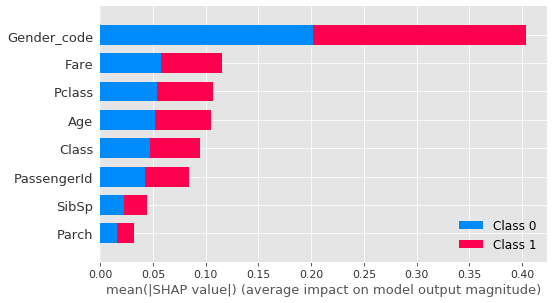

In [184]:
#checking how variables affected the models decsion making, we are going to use shap test
import shap
randomforest.fit(X = X_train, y = y_train)
explainer = shap.TreeExplainer(randomforest)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns)

As mentioned in the paper titled 'SOCIAL CLASS AND SURVIVAL ON THE S.S. TITANIC ' that Gender and social class affected survical rate (Hall, 1986) we can see that indeed Gender which include male and Female as well as Fare which depicts social class assuming that the rich bought a more expensive ticket and the poor went for a cheaper one affected there chances of survival. This is true considering that Gender and Fare contribute most on the decision of the tree. However we will continue with our ananlysis to find out wether indeed women had a higher chance of surviving than men. When we mention Men we are considering the Male gender over 18 yesrs of Age, this is considering that any Male or female under the age of 18 is a child.

# Statistical ananlysis and inference

In [186]:
new_data=data.groupby(by="Gender_code")

In [211]:
new_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Class,Gender_code
0,1,0,3,22.000000,1,0,7.2500,3,1
1,2,1,1,38.000000,1,0,71.2833,1,0
2,3,1,3,26.000000,0,0,7.9250,3,0
3,4,1,1,35.000000,1,0,53.1000,1,0
4,5,0,3,35.000000,0,0,8.0500,3,1
5,6,0,3,29.881138,0,0,8.4583,3,1
6,7,0,1,54.000000,0,0,51.8625,1,1
7,8,0,3,2.000000,3,1,21.0750,3,1
8,9,1,3,27.000000,0,2,11.1333,3,0
9,10,1,2,14.000000,1,0,30.0708,2,0


In [187]:
#selecting the Male data from the entire dataset
Male=new_data.get_group(1)

In [190]:
#selecting Female data from entire dataset
Female=new_data.get_group(0)

In [212]:
Female

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Class,Gender_code
1,2,1,1,38.000000,1,0,71.2833,1,0
2,3,1,3,26.000000,0,0,7.9250,3,0
3,4,1,1,35.000000,1,0,53.1000,1,0
8,9,1,3,27.000000,0,2,11.1333,3,0
9,10,1,2,14.000000,1,0,30.0708,2,0
...,...,...,...,...,...,...,...,...,...
880,881,1,2,25.000000,0,1,26.0000,2,0
882,883,0,3,22.000000,0,0,10.5167,3,0
885,886,0,3,39.000000,0,5,29.1250,3,0
887,888,1,1,19.000000,0,0,30.0000,1,0


In [189]:
Men=Male[Male['Age'] >= 18] 

In [191]:
Women=Female[Female['Age'] >= 18] 

In [215]:
male_array=np.array(Men["Survived"])

In [216]:
Female_array=np.array(Women["Survived"])

In [217]:
import random
random.seed(30)
sampling_men= random.choices(male_array,k=100)
sampling_women= random.choices(Female_array,k=100)

H0 : Women are more likely to have survived Titanic ship sink than men i.e Gender had influence
H1 : Gender had no influence on the chances of surviving Titanic

In [220]:
#perform p values 
import pandas as pd
from scipy import stats
ttest,pval = stats.ttest_rel(sampling_men,sampling_women)
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

6.3156174180008895e-15
reject null hypothesis


Again our results above inform us to reject the Null hypothes and favour the alternative which is gender played a role p>0.05. Considering that indeed our results are correct and we haven't encountered type 2 error we can say that we agree with the results of (Hall, 1986) that indeed Gender did play a role in the likelihood of one to survive. 

In [221]:
#confirming
print("survilal men  mean  % .3f"%np.mean(sampling_men))
print("survival women mean s %.3f"%np.mean(sampling_women))

survilal men  mean   0.160
survival women mean s 0.690


# Analysis by Social class (Part of Statistical Analysis)

In [222]:
social_status_data=data.groupby(by="Class")

In [223]:
First_class=social_status_data.get_group(1) 
Second_class=social_status_data.get_group(2) 
Third_class=social_status_data.get_group(3) 

In [224]:
First_class_array=np.array(First_class["Survived"])

In [225]:
Third_class_array=np.array(Third_class["Survived"])

In [227]:
import random
random.seed(30)
sampling_First_class= random.choices(First_class_array,k=100)
sampling_third_class= random.choices(Third_class_array,k=100)

H0 : Social Status affected the likelihood of survival
H1 : Social Status did not affect likelihood of survival

In [228]:
#perform p values 
import pandas as pd
from scipy import stats
ttest,pval = stats.ttest_rel(sampling_third_class,sampling_First_class)
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

3.7873535584443626e-14
reject null hypothesis


The Results above also agree with Hall, 1986) that Socila class contributed to ones probability of surviving titanic p>0.05. This is true as according to Washington post The Titanic sank at night, and most third-class passengers were well below the dock, making such access impossible

# How the Analysis was done

For analyzing the role gender played on the chances of surviving, we grouped our data into two groups based on gender i.e wome=0 and male group=1, the code were auto generated by our encoder from sklearn.preprosessing. I then selected samples that were over eighteen in each group assuming that anyone less that 18 years of age is a child regardless of the gender. I then randomply picked 100 samples from each group and compared the number of alive and dead. Through this repeated analysis we found that onaverage 0.690 (69) women survived out of 100 and 0.160(16) men would survive out of 100. 

When it comes to class: According to Washington post The Titanic sank at night, and most third-class passengers were well below the dock, making such access impossible

# Other Notes

Considering that this was not major a machine learning model comparison, I choose my favourite model which is Random Forest as it is easy to explain how it works. I then compared the accuracy with a model we learnt in class which is logistic regression. Out of the Two random Forst had the best performance with and accuracy of 0.84. I also apllied KNN in filling out the age missing values which I thought was the best option given our data and the nature of KNN

NB: This analysis were possible after we did the shap analysis on the Random Forest which had the highest accuracy score. Through the hap resukts we were able to do statistcal inference given that it informed us how each variable contributed to the model classification

# Refrences

Hall, W. (1986). Social class and survival on the S.S. Titanic. Social Science & Medicine, 22(6), 687-690. doi: 10.1016/0277-9536(86)90041-9

2020. [online] Available at: <https://www.washingtonpost.com/opinions/women-and-children-did-go-first-on-titanic/2012/04/19/gIQAgSaugT_story.html> [Accessed 19 December 2020].